<a href="https://colab.research.google.com/github/BatmarcNYU/dataScienceBootCamp/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Threshold: 0.4
Accuracy: 0.8785046728971962
Precision: 0.855970695970696
Recall: 0.7922530975580416

Threshold: 0.6
Accuracy: 0.8411214953271028
Precision: 0.8536307762349191
Recall: 0.686875977384819

Threshold: 0.7
Accuracy: 0.8364485981308412
Precision: 0.9116161616161615
Recall: 0.6568627450980392

Threshold: 0.4
Accuracy: 0.8785046728971962
Precision: 0.855970695970696
Recall: 0.7922530975580416

Threshold: 0.6
Accuracy: 0.8411214953271028
Precision: 0.8536307762349191
Recall: 0.686875977384819

Threshold: 0.7
Accuracy: 0.8364485981308412
Precision: 0.9116161616161615
Recall: 0.6568627450980392


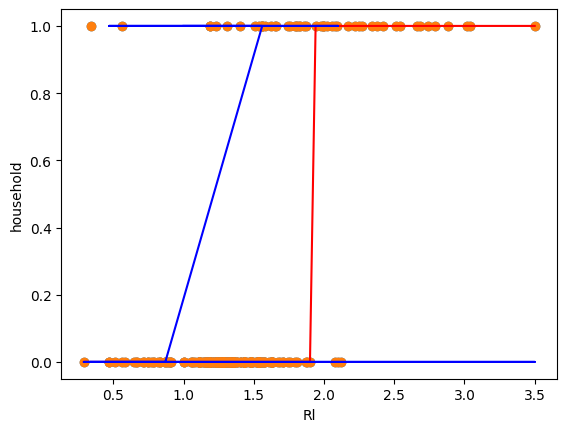

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

glass = pd.read_csv('/content/glass.csv')

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

# Split the data into features and target variable
y = glass['Type']  # Target variable
X = glass.drop(columns=['Type'])  # Features

# 3)Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household
# print(glass.info())


logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

# 1)Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
thresholds = [0.4, 0.6, 0.7]

for threshold in thresholds:
    y_pred_thresholded = (logreg.predict_proba(X)[:, 1] > threshold).astype(int)
    print("\nThreshold:", threshold)
    print("Accuracy:", accuracy_score(y, y_pred_thresholded))
    print("Precision:", precision_score(y, y_pred_thresholded, average='macro'))
    print("Recall:", recall_score(y, y_pred_thresholded, average='macro'))

# 2)Do the same analysis for other columns
# ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type', 'household']
glass.sort_values( by = 'RI', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='blue')
plt.xlabel('Rl')
plt.ylabel('household')

# 1)Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.
glass['household_pred_prob_Ri'] = logreg.predict_proba(X)[:, 1]
thresholds = [0.4, 0.6, 0.7]

for threshold in thresholds:
    y_pred_thresholded = (logreg.predict_proba(X)[:, 1] > threshold).astype(int)
    print("\nThreshold:", threshold)
    print("Accuracy:", accuracy_score(y, y_pred_thresholded))
    print("Precision:", precision_score(y, y_pred_thresholded, average='macro'))
    print("Recall:", recall_score(y, y_pred_thresholded, average='macro'))